In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

import folium
from folium.plugins import MarkerCluster

import en_nlp_utils

In [2]:
# Define default source path
SRC_PATH = "src/"

In [3]:
# Load dataset
df_hotel = pd.read_csv(SRC_PATH + "en_hotel.csv")
df_review = pd.read_csv(SRC_PATH + "en_hotel_review.csv")

## 1) Data overview

### a) For df_hotel dataset

In [4]:
en_nlp_utils.data_quality_report(df_hotel)

,source,hotel_id,hotel_name,hotel_address,hotel_postal_code,lat,lon,total_reviews,overall_rating,overall_rating_category,rating_location,rating_service,rating_cleanliness,rating_room_comfort_and_quality,rating_value_for_money,rating_facilities
count,584,584.0,584,584,584.0,584.0,584.0,584.0,584.0,584,584.0,584.0,584.0,584.0,584.0,584.0
unique,2,NaN,482,571,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Agoda,NaN,Dorsett Singapore,"8 Sentosa Gateway, Sentosa Island, 098269 Sing...",NaN,NaN,NaN,NaN,NaN,Excellent,NaN,NaN,NaN,NaN,NaN,NaN
freq,361,NaN,2,4,NaN,NaN,NaN,NaN,NaN,308,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4196197.890411,NaN,NaN,212863.414384,1.2996,103.852898,2743.756849,8.025856,NaN,8.578938,8.430308,8.28887,7.982192,7.903596,7.828253
std,NaN,9892345.248704,NaN,NaN,136859.184811,0.020653,0.029717,4274.561985,0.721775,NaN,0.724517,0.755737,0.88331,0.848199,0.618389,0.923566
min,NaN,1.0,NaN,NaN,18953.0,1.2459,103.7393,5.0,4.6,NaN,5.9,5.1,4.7,4.0,4.8,4.2
25%,NaN,146.75,NaN,NaN,98679.0,1.287575,103.8416,544.25,7.7,NaN,8.1,8.0,7.875,7.6,7.6,7.3
50%,NaN,91489.5,NaN,NaN,199675.5,1.3011,103.8502,1341.5,8.1,NaN,8.7,8.6,8.4,7.7,8.0,7.9
75%,NaN,1177933.5,NaN,NaN,239162.0,1.310325,103.858625,3122.5,8.6,NaN,9.2,9.0,9.0,8.7,8.3,8.5


### b) For df_review dataset

In [5]:
en_nlp_utils.data_quality_report(df_review)

,source,hotel_id,hotel_name,country,group_name,room_type,stay_length,stay_date,review_score,review_score_category,sentiment,review_date,review_title,review,review_cleaned_v1
count,39974,39974.0,39974,39974,39974,39974,39974.0,39974,39974.0,39974,39974,39974,39973,39974,39831
unique,2,NaN,375,154,7,7,NaN,23,NaN,5,2,681,19954,37581,36140
top,Agoda,NaN,V Hotel Lavender,Singapore,Couple,Double Room,NaN,01/01/2024,NaN,Exceptional,positive,29/01/2024,Exceptional,Good,good
freq,31582,NaN,1199,9530,14910,14552,NaN,5651,NaN,13346,31758,432,2437,290,514
mean,NaN,4327700.79972,NaN,NaN,NaN,NaN,2.704758,NaN,7.867494,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9853206.116791,NaN,NaN,NaN,NaN,2.286803,NaN,1.905423,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,10580.0,NaN,NaN,NaN,NaN,1.0,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,239470.0,NaN,NaN,NaN,NaN,2.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1620253.0,NaN,NaN,NaN,NaN,3.0,NaN,9.2,NaN,NaN,NaN,NaN,NaN,NaN


## 2) Convert data types

### a) For df_hotel dataset

In [6]:
# Convert "overall_rating_category" column as category data type
df_hotel["overall_rating_category"] = pd.Categorical(
    df_hotel["overall_rating_category"],
    categories=["Below Expectation", "Good", "Very Good", "Excellent", "Exceptional"],
    ordered=True
)

### b) For df_review dataset

In [7]:
# Convert "group_name" column as category data type
df_review["group_name"] = pd.Categorical(
    df_review["group_name"],
    categories=["Couple", "Family", "Family with young children", "Solo traveler", "Business traveler", "Group", "Other"],
    ordered=True
)

# Convert "review_score_category" column as category data type
df_review["review_score_category"] = pd.Categorical(
    df_review["review_score_category"],
    categories=["Below Expectation", "Good", "Very Good", "Excellent", "Exceptional"],
    ordered=True
)

# Convert "stay_date" and "review_date" columns as datetime data type
df_review["stay_date"] = pd.to_datetime(df_review["stay_date"], format="%d/%m/%Y")
df_review["review_date"] = pd.to_datetime(df_review["review_date"], format="%d/%m/%Y")

## 3) EDA for df_hotel

In [8]:
# Find out all hotels from Agoda / Booking
df_hotel_agoda = df_hotel[df_hotel["source"] == "Agoda"]
df_hotel_booking = df_hotel[df_hotel["source"] == "Booking"]

### a) Proportion of Hotels by Source

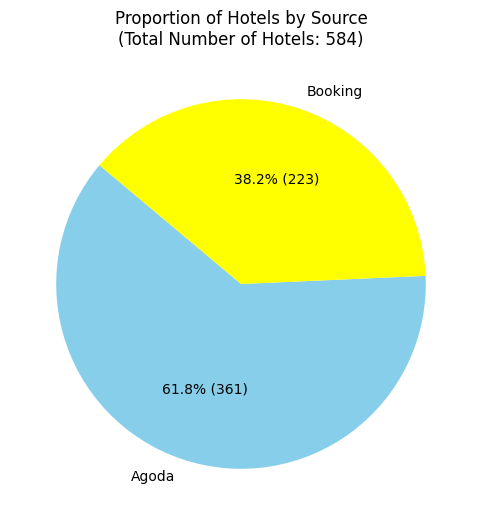

In [9]:
# Count number of hotels by source
source_counts = df_hotel["source"].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(source_counts, labels=source_counts.index, autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(source_counts) / 100), startangle=140, colors=["skyblue", "yellow"])
plt.title("Proportion of Hotels by Source\n(Total Number of Hotels: {:,})".format(sum(source_counts)))
plt.show()

### b) Distribution of overall_rating

#### For Agoda & Booking

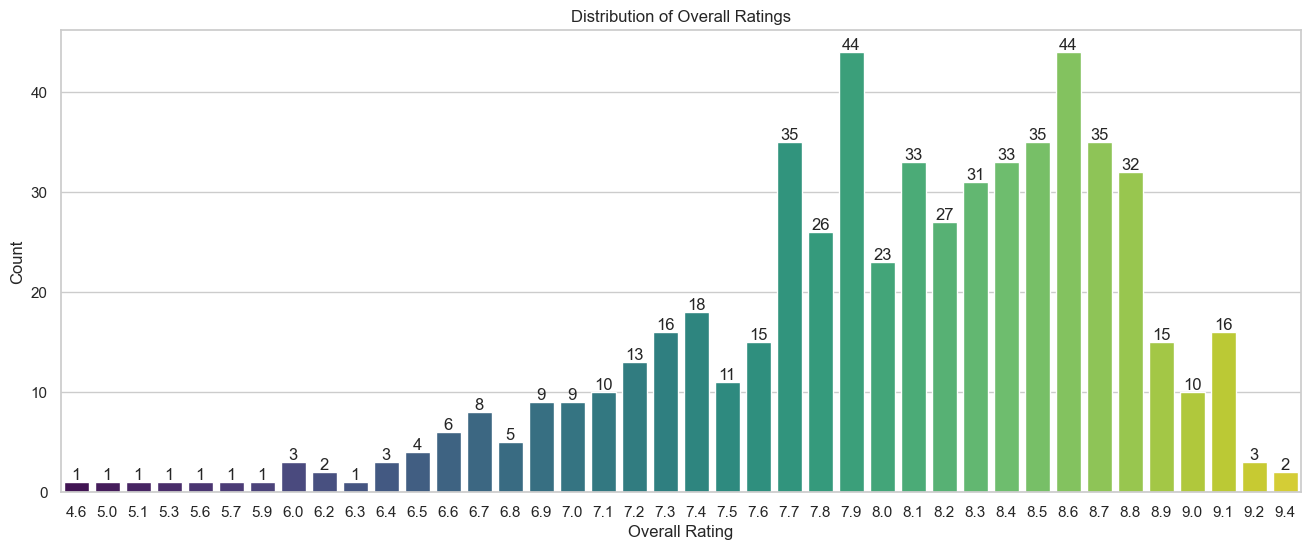

In [10]:
# Set figure style
sns.set(style="whitegrid")

plt.figure(figsize=(16, 6))
ax = sns.countplot(x="overall_rating", data=df_hotel, palette="viridis")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.show()

#### Group by Source

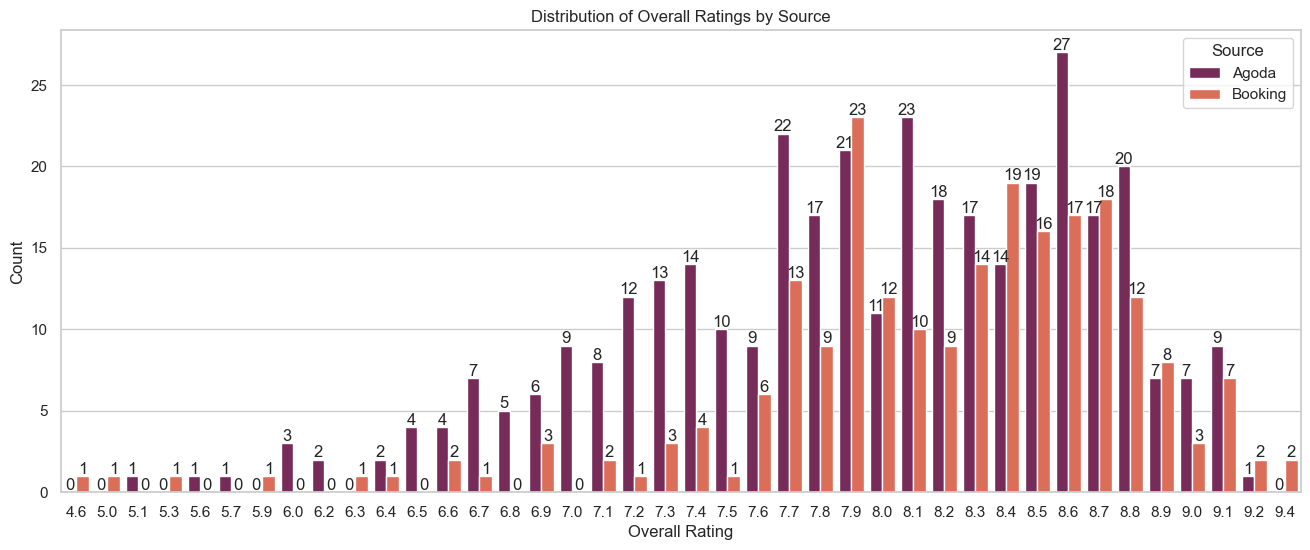

In [11]:
# Set figure style
sns.set(style="whitegrid")

plt.figure(figsize=(16, 6))
ax = sns.countplot(x="overall_rating", data=df_hotel, hue="source", palette="rocket")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Overall Ratings by Source")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.legend(title="Source")
plt.show()

### c) Distribution of overall_rating_category

#### For Agoda & Booking

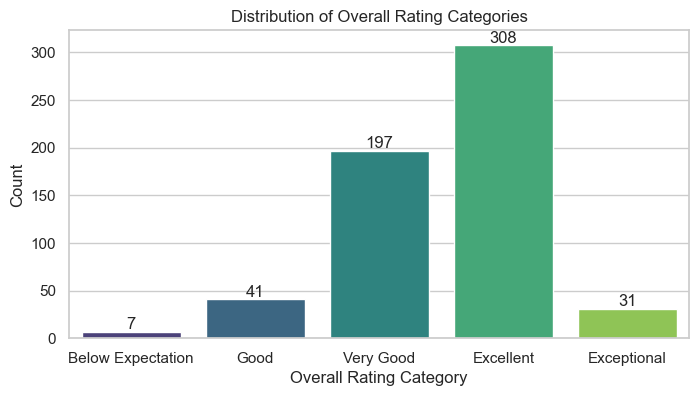

In [12]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="overall_rating_category", data=df_hotel, palette="viridis")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Overall Rating Categories")
plt.xlabel("Overall Rating Category")
plt.ylabel("Count")
plt.show()

#### Group by Source

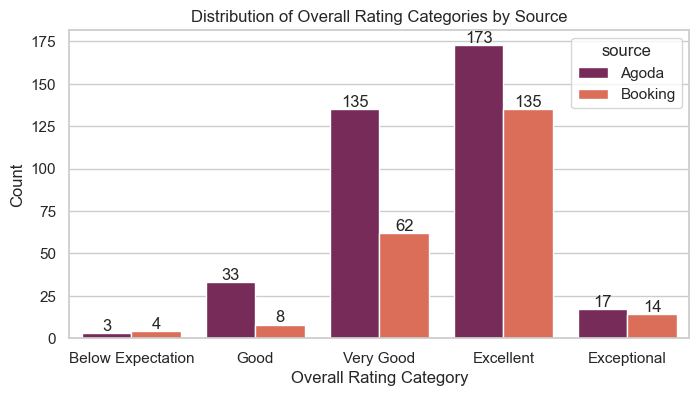

In [13]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="overall_rating_category", data=df_hotel, hue="source", palette="rocket")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Overall Rating Categories by Source")
plt.xlabel("Overall Rating Category")
plt.ylabel("Count")
plt.show()

### d) Distribution of all sub ratings

#### For Agoda & Booking

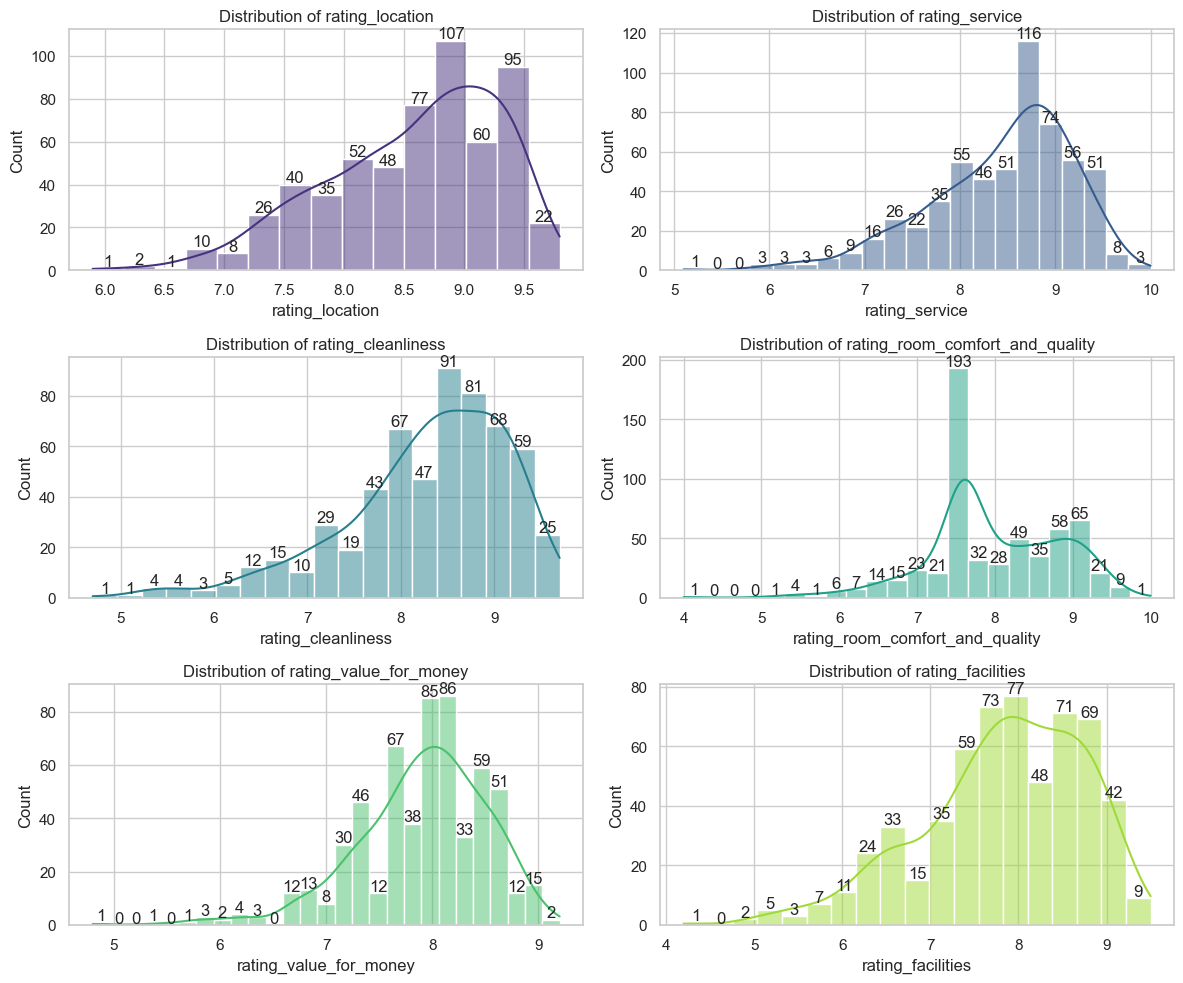

In [14]:
# Get columns of all sub ratings 
sub_ratings = df_hotel.iloc[:, -6:]

# Set the color palette
colors = sns.color_palette("viridis", n_colors=len(sub_ratings.columns))

# Plot charts
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
for i, (column, color) in enumerate(zip(sub_ratings.columns, colors)):
    row, col = i // 2, i % 2
    sns.histplot(df_hotel[column], ax=axes[row, col], kde=True, color=color)
    axes[row, col].set_title(f"Distribution of {column}")
    
    # Add annotations for bar counts
    for p in axes[row, col].patches:
        axes[row, col].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha="center", va="center", xytext=(0, 5), textcoords="offset points")
        
plt.tight_layout()
plt.show()

#### Group by Source

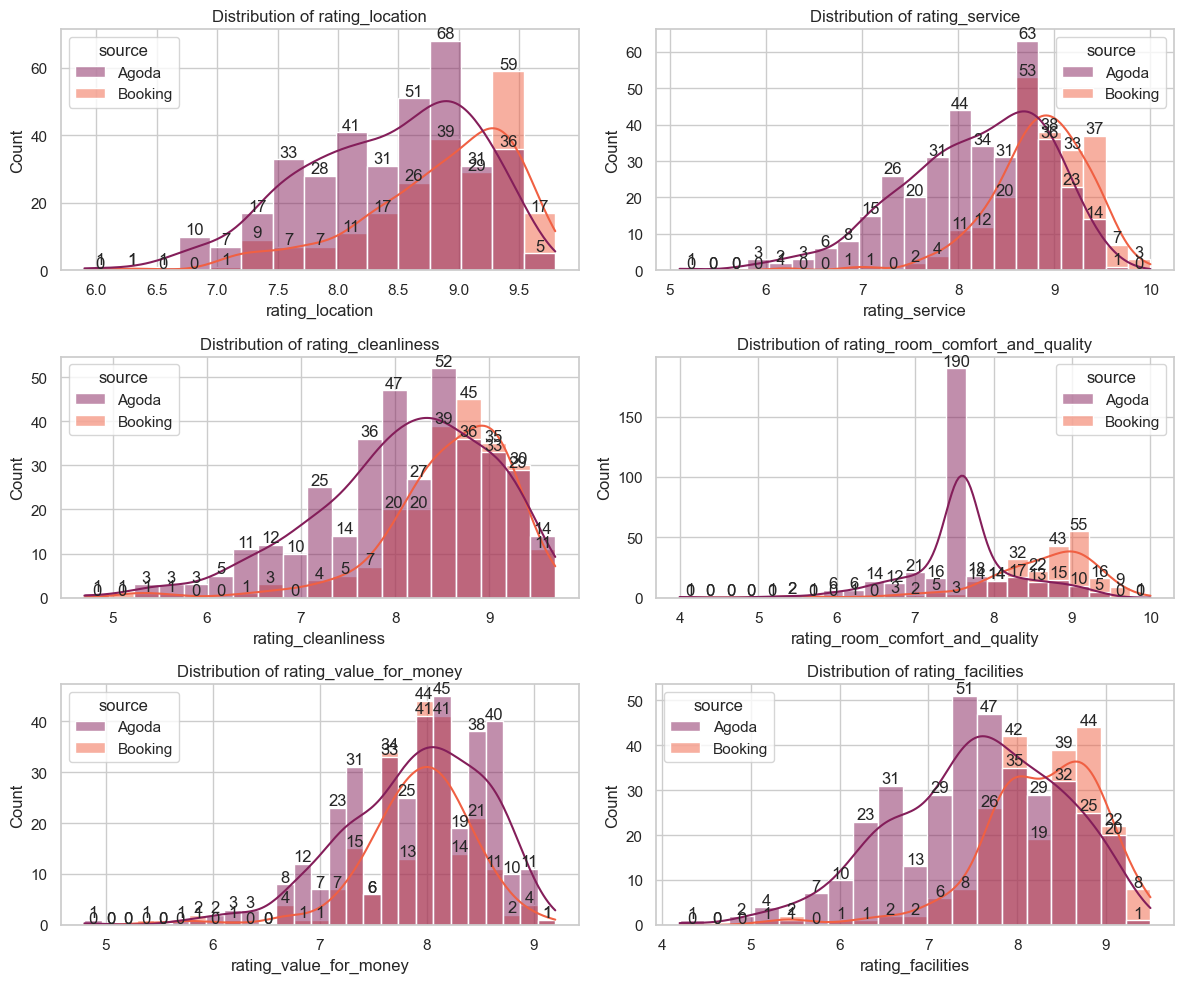

In [15]:
# Plot charts
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
for i, column in enumerate(sub_ratings.columns):
    row, col = i // 2, i % 2
    sns.histplot(data=df_hotel, x=column, hue="source", kde=True, ax=axes[row, col], palette="rocket")
    axes[row, col].set_title(f"Distribution of {column}")
    
    # Add annotations for bar counts
    for p in axes[row, col].patches:
        axes[row, col].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha="center", va="center", xytext=(0, 5), textcoords="offset points")
        
plt.tight_layout()
plt.show()

### e) Correlation matrix for rating scores

#### For Agoda & Booking

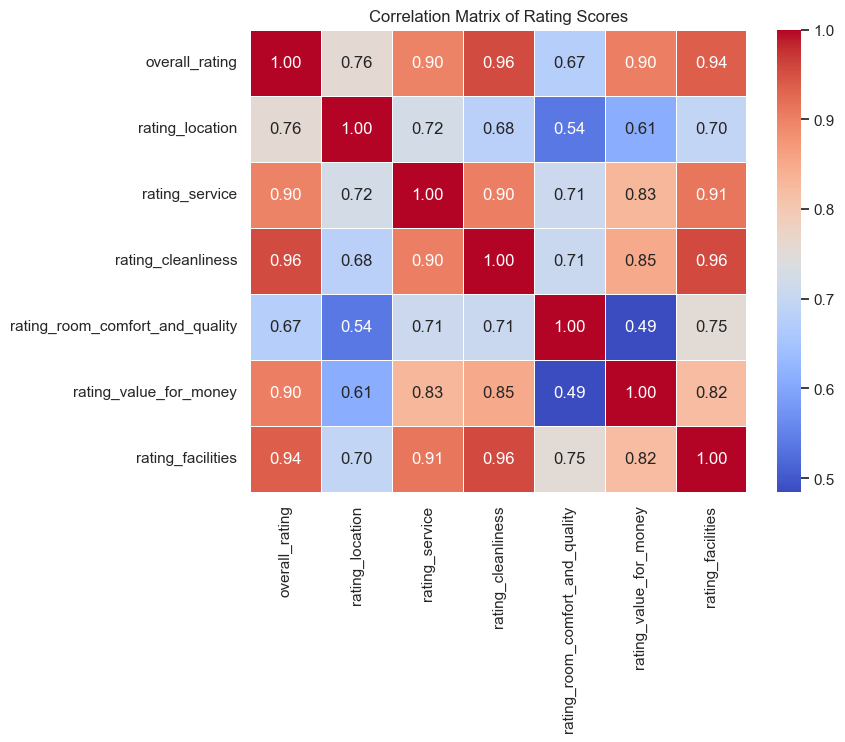

In [16]:
# Extract relevant columns for correlation analysis
correlation_columns = ["overall_rating", "rating_location", "rating_service", "rating_cleanliness",
                        "rating_room_comfort_and_quality", "rating_value_for_money", "rating_facilities"]

# Compute the correlation matrix
correlation_matrix = df_hotel[correlation_columns].corr()

# Plot headmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix of Rating Scores")
plt.show()

#### For Agoda

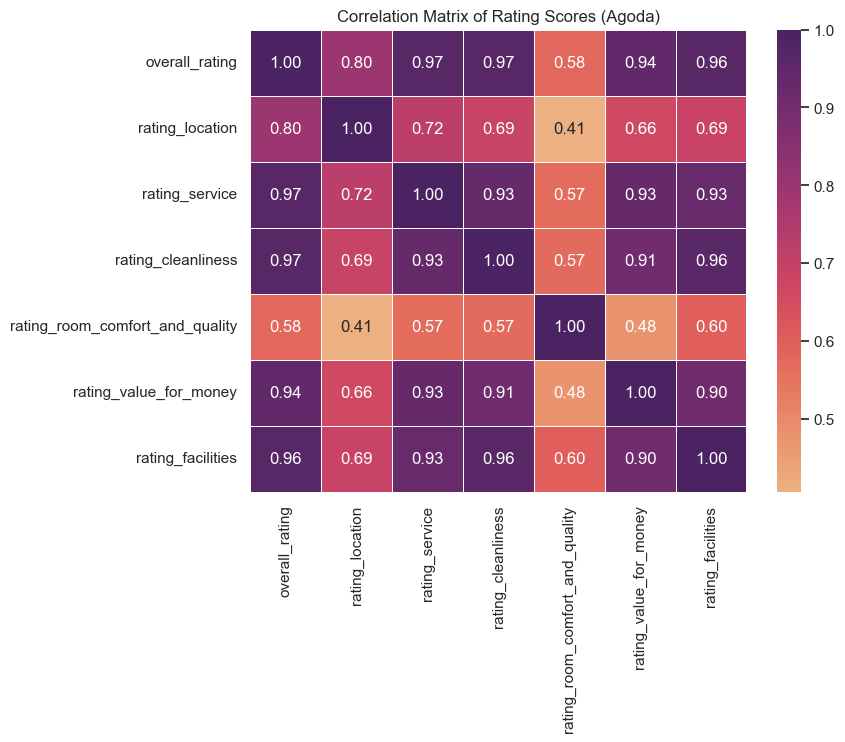

In [17]:
# Compute the correlation matrix
correlation_matrix_agoda = df_hotel_agoda[correlation_columns].corr()

# Plot headmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_agoda, annot=True, cmap="flare", fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix of Rating Scores (Agoda)")
plt.show()

#### For Booking

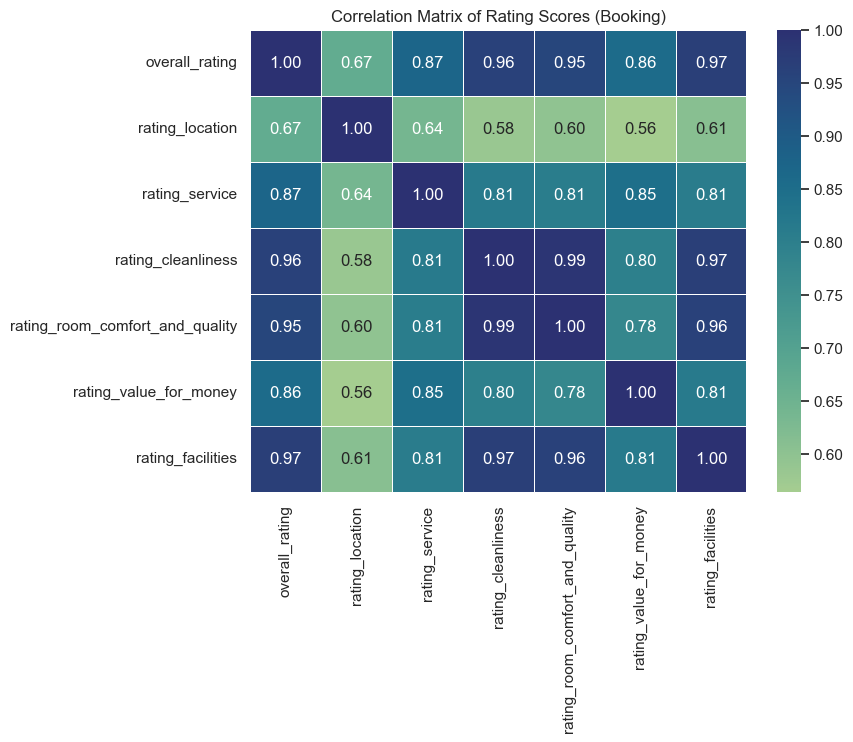

In [18]:
# Compute the correlation matrix
correlation_matrix_booking = df_hotel_booking[correlation_columns].corr()

# Plot headmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_booking, annot=True, cmap="crest", fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix of Rating Scores (Booking)")
plt.show()

### f) Distribution of hotels in Singapore Map

#### For all hotels

In [19]:
# Find duplicate hotel based on hotel_name
# Note: Those hotels extracted from different source
duplicate_hotels = df_hotel[df_hotel.duplicated(subset="hotel_name", keep=False)]

# Remove duplicate hotel rows from df_hotel
df_hotel_remove_duplicate = df_hotel.drop_duplicates(subset="hotel_name", keep="first")

In [20]:
# Longitude and latitude of Singapore
singapore_location = [1.3521, 103.8198]

# Create map
m = folium.Map(location=singapore_location, zoom_start=12)

# Use MarkerCluster to add hotel markers
marker_cluster = MarkerCluster().add_to(m)

# Add hotel markers in map
for index, row in df_hotel_remove_duplicate.iterrows():
    folium.Marker(
        location=[row["lat"], row["lon"]],
        popup=row["hotel_name"],
    ).add_to(marker_cluster)

# Save map as html file
m.save(SRC_PATH + "hotel_distribution_map.html")

#### For Agoda

In [21]:
# Create map
m_agoda = folium.Map(location=singapore_location, zoom_start=12)

# Use MarkerCluster to add hotel markers
marker_cluster_agoda = MarkerCluster().add_to(m_agoda)

# Add hotel markers in map
for index, row in df_hotel_agoda.iterrows():
    folium.Marker(
        location=[row["lat"], row["lon"]],
        popup=row["hotel_name"],
    ).add_to(marker_cluster_agoda)

# Save map as html file
m_agoda.save(SRC_PATH + "hotel_distribution_map_agoda.html")

#### For Booking

In [22]:
# Create map
m_booking = folium.Map(location=singapore_location, zoom_start=12)

# Use MarkerCluster to add hotel markers
marker_cluster_booking = MarkerCluster().add_to(m_booking)

# Add hotel markers in map
for index, row in df_hotel_booking.iterrows():
    folium.Marker(
        location=[row["lat"], row["lon"]],
        popup=row["hotel_name"],
    ).add_to(marker_cluster_booking)

# Save map as html file
m_booking.save(SRC_PATH + "hotel_distribution_map_booking.html")

## 4) EDA for df_review

In [23]:
# Find out all hotels from Agoda / Booking
df_review_agoda = df_review[df_review["source"] == "Agoda"]
df_review_booking = df_review[df_review["source"] == "Booking"]

### a) Proportion of Reviews by Source

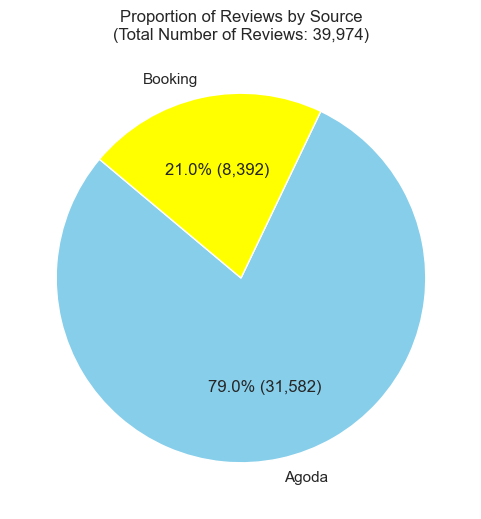

In [24]:
# Count number of reviews by source
source_review_counts = df_review["source"].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(source_review_counts, labels=source_review_counts.index, autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(source_review_counts) / 100), startangle=140, colors=["skyblue", "yellow"])
plt.title("Proportion of Reviews by Source\n(Total Number of Reviews: {:,})".format(sum(source_review_counts)))
plt.show()

### b) Distribution of review_score

#### For Agoda & Booking

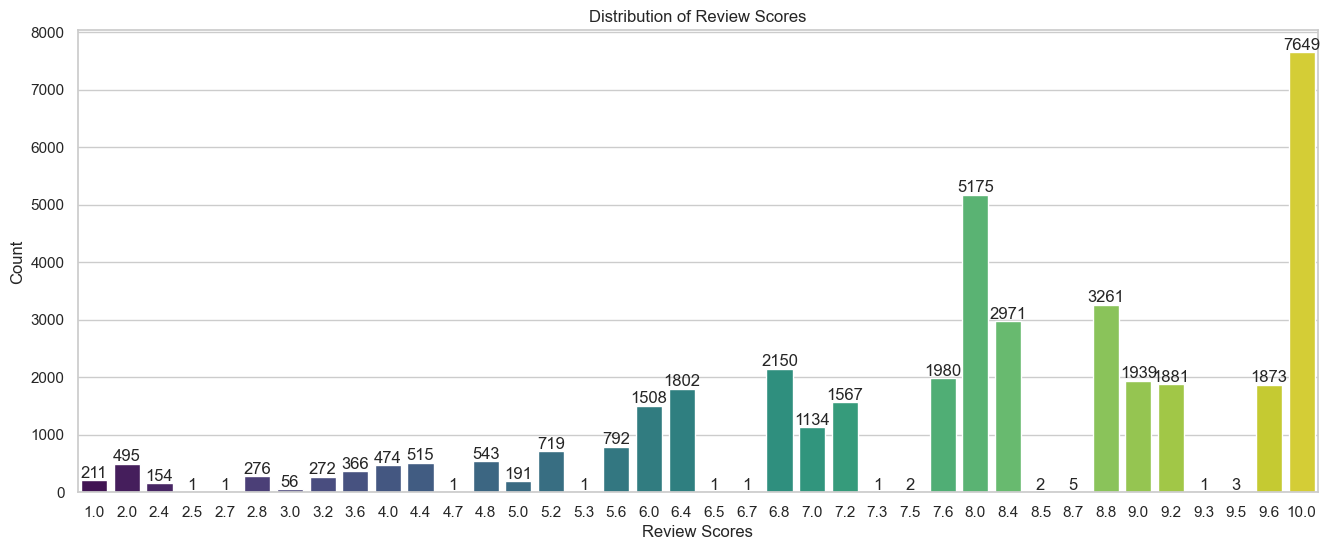

In [25]:
# Set figure style
sns.set(style="whitegrid")

plt.figure(figsize=(16, 6))
ax = sns.countplot(x="review_score", data=df_review, palette="viridis")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Review Scores")
plt.xlabel("Review Scores")
plt.ylabel("Count")
plt.show()

#### Group by Source

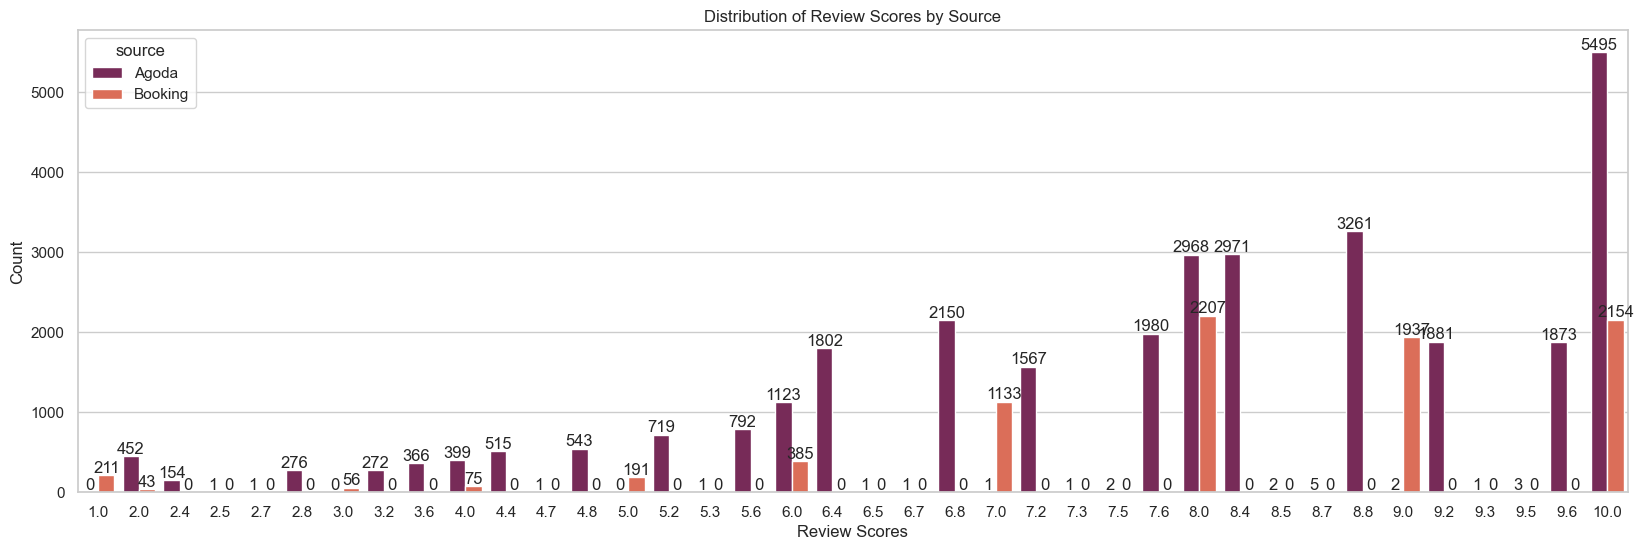

In [26]:
# Set figure style
sns.set(style="whitegrid")

plt.figure(figsize=(20, 6))
ax = sns.countplot(x="review_score", data=df_review, hue="source", palette="rocket")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Review Scores by Source")
plt.xlabel("Review Scores")
plt.ylabel("Count")
plt.show()

### c) Distribution of review_score_category

#### For Agoda & Booking

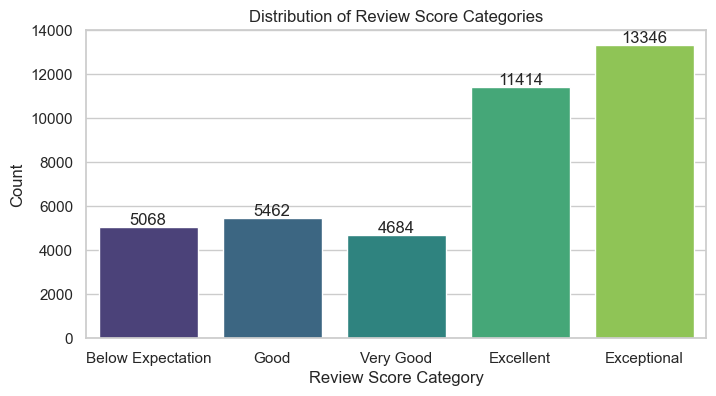

In [27]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="review_score_category", data=df_review, palette="viridis")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Review Score Categories")
plt.xlabel("Review Score Category")
plt.ylabel("Count")
plt.show()

#### Group by Source

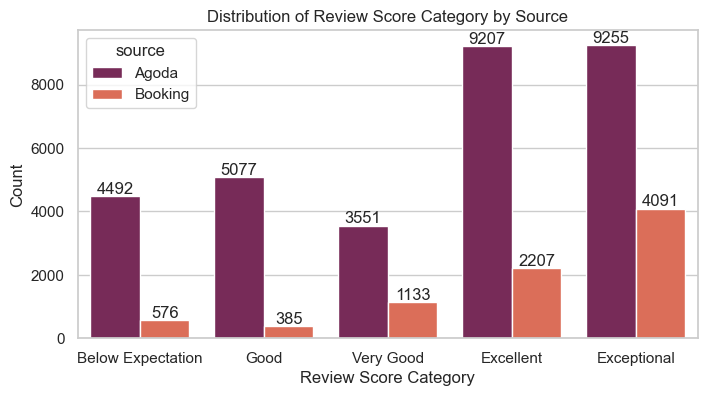

In [28]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="review_score_category", data=df_review, hue="source", palette="rocket")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Review Score Category by Source")
plt.xlabel("Review Score Category")
plt.ylabel("Count")
plt.show()

### d) Distribution of Reviewers' group type

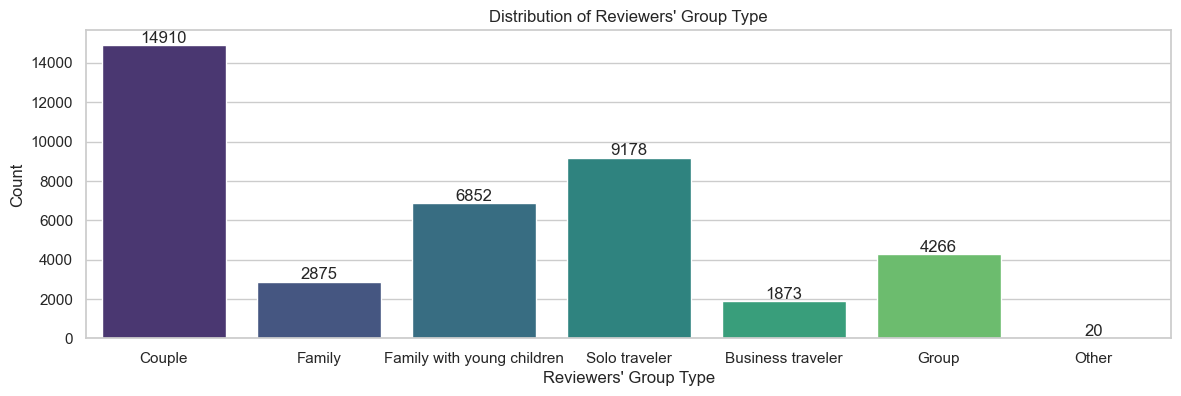

In [29]:
plt.figure(figsize=(14, 4))
ax = sns.countplot(x="group_name", data=df_review, palette="viridis")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Reviewers' Group Type")
plt.xlabel("Reviewers' Group Type")
plt.ylabel("Count")
plt.show()

#### Group by Source

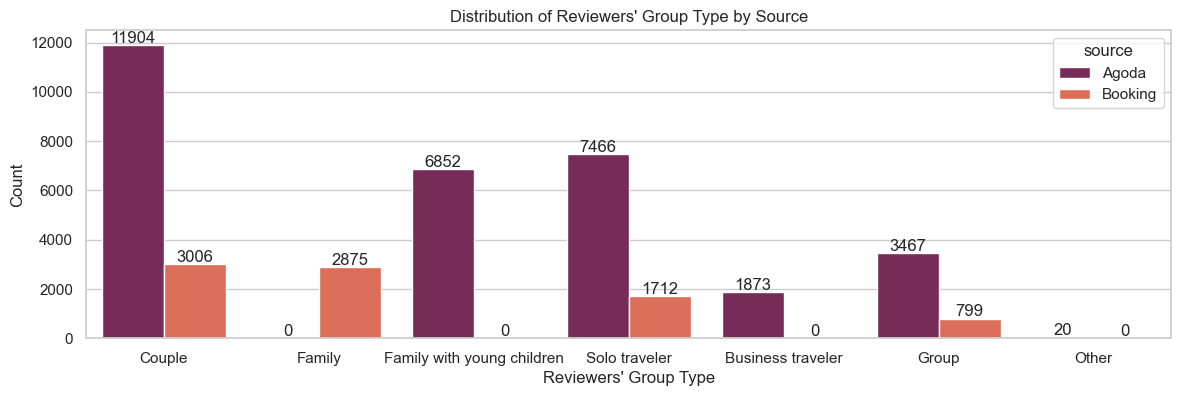

In [30]:
plt.figure(figsize=(14, 4))
ax = sns.countplot(x="group_name", data=df_review, hue="source", palette="rocket")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Reviewers' Group Type by Source")
plt.xlabel("Reviewers' Group Type")
plt.ylabel("Count")
plt.show()

### e) Distribution of Reviewers' stay_length

#### For Agoda & Booking

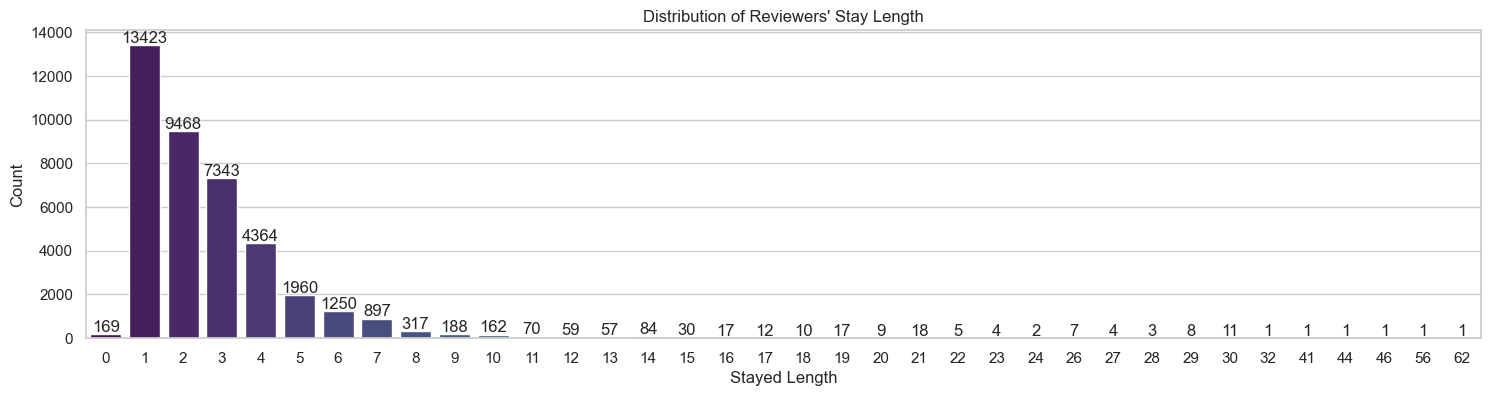

In [31]:
plt.figure(figsize=(18, 4))
ax = sns.countplot(x="stay_length", data=df_review, palette="viridis")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Reviewers' Stay Length")
plt.xlabel("Stayed Length")
plt.ylabel("Count")
plt.show()

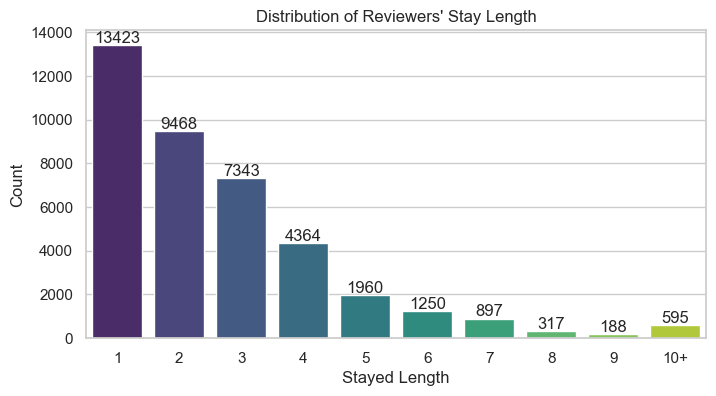

In [32]:
# Add a new column to represent modified stay_length
# If stay_length >= 10, group as "10+"
df_review["modified_stay_length"] = df_review["stay_length"].apply(lambda x: '10+' if x >= 10 else str(x))

# Convert "modified_stay_length" column's data type to category
df_review["modified_stay_length"] = pd.Categorical(
    df_review["modified_stay_length"],
    categories=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10+"],
    ordered=True
)

plt.figure(figsize=(8, 4))
ax = sns.countplot(x="modified_stay_length", data=df_review, palette="viridis")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Reviewers' Stay Length")
plt.xlabel("Stayed Length")
plt.ylabel("Count")
plt.show()

#### Group by Source

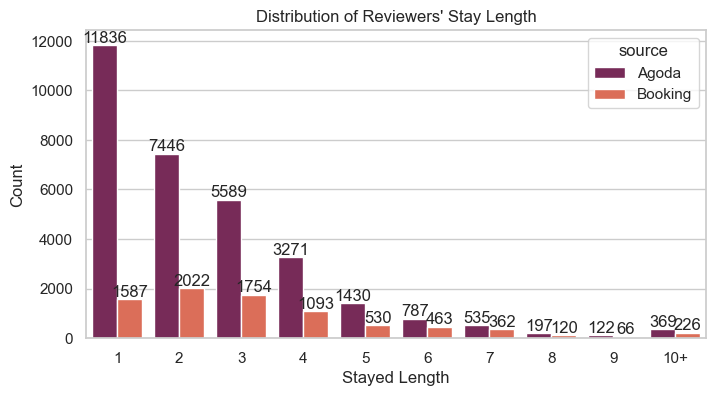

In [33]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="modified_stay_length", data=df_review, hue="source", palette="rocket")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Reviewers' Stay Length")
plt.xlabel("Stayed Length")
plt.ylabel("Count")
plt.show()

### f) Distribution of Review Count

#### By review_date

##### For Agoda & Booking

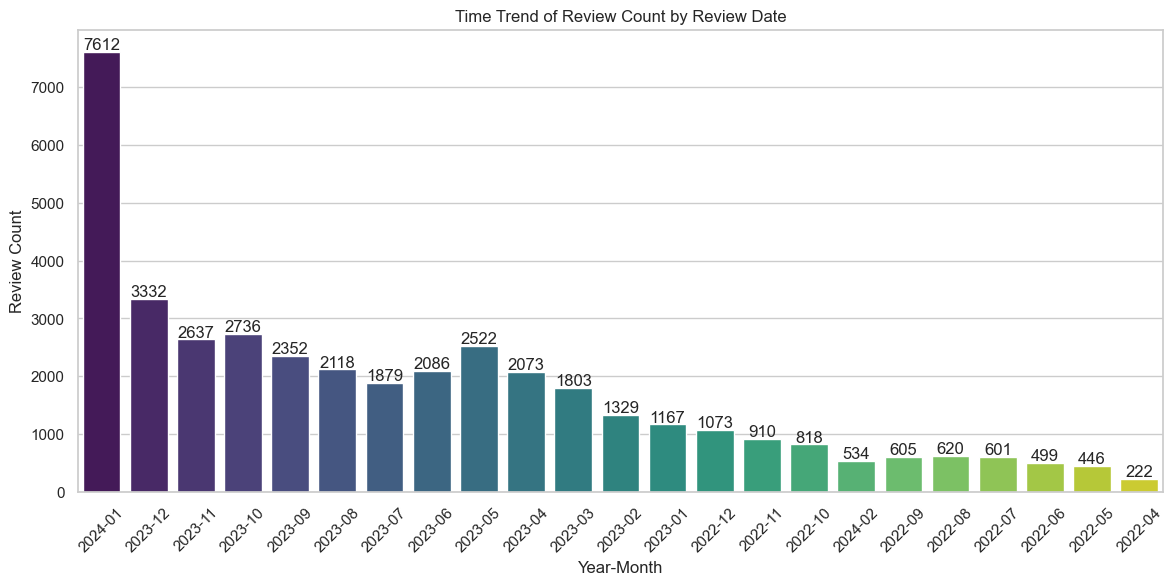

In [34]:
# Extract year and month from "review_date" column
df_review["review_year_month"] = df_review["review_date"].dt.to_period("M")

# Plot the time trend of review counts
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="review_year_month", data=df_review, palette="viridis")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Time Trend of Review Count by Review Date")
plt.xlabel("Year-Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.show()

##### Group by Source

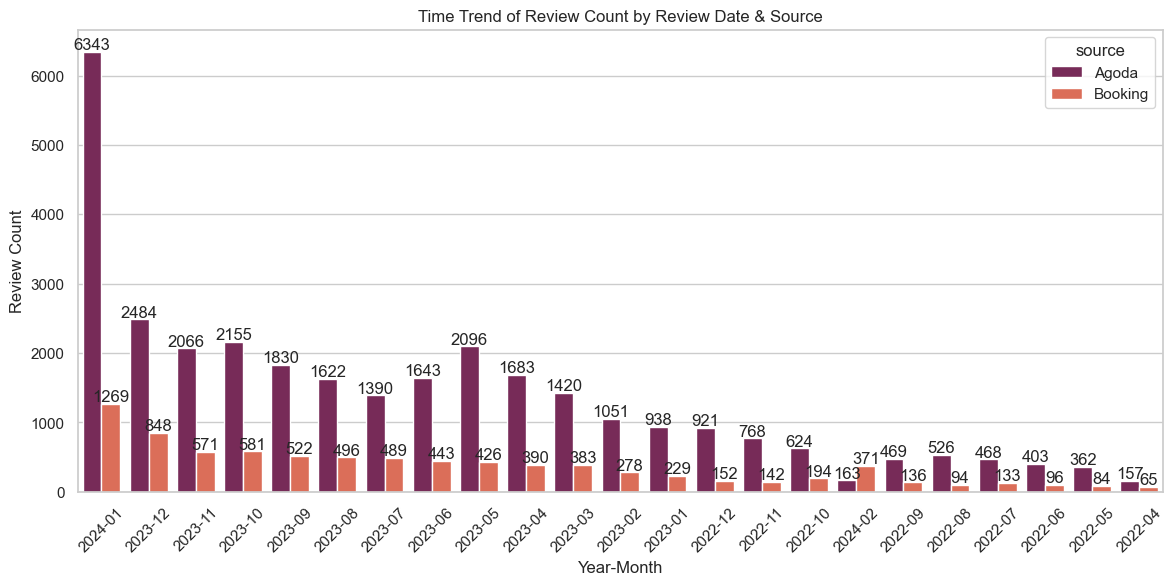

In [35]:
# Plot the time trend of review counts
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="review_year_month", data=df_review, hue="source", palette="rocket")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Time Trend of Review Count by Review Date & Source")
plt.xlabel("Year-Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.show()

#### By stay_date

#### For Agoda & Booking

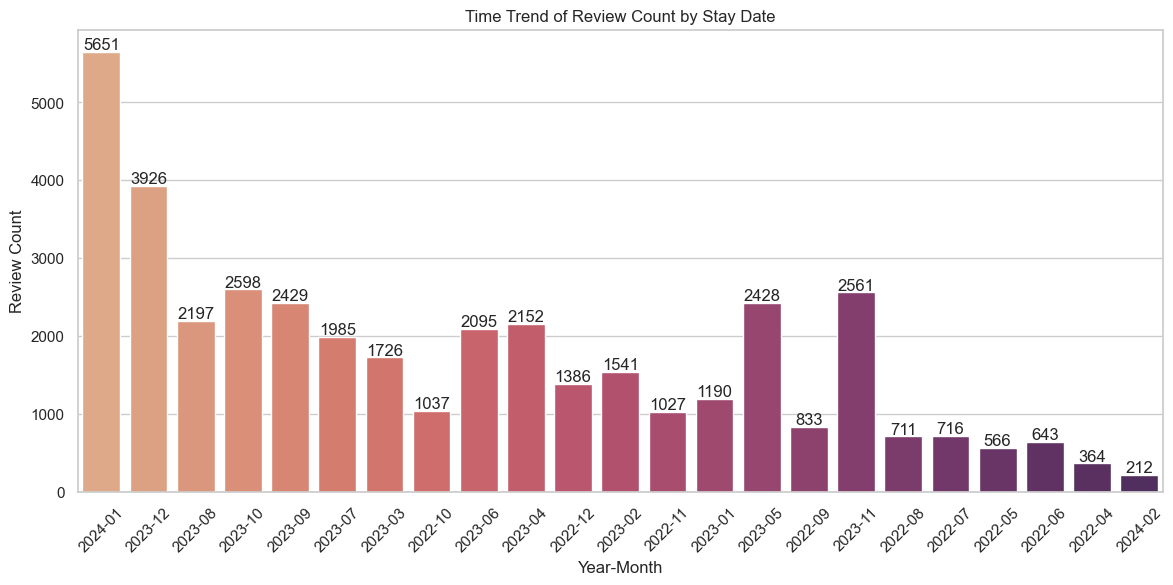

In [36]:
# Extract year and month from "review_date" column
df_review["stay_year_month"] = df_review["stay_date"].dt.to_period("M")

# Plot the time trend of review counts
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="stay_year_month", data=df_review, palette="flare")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Time Trend of Review Count by Stay Date")
plt.xlabel("Year-Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.show()

##### Group by Source

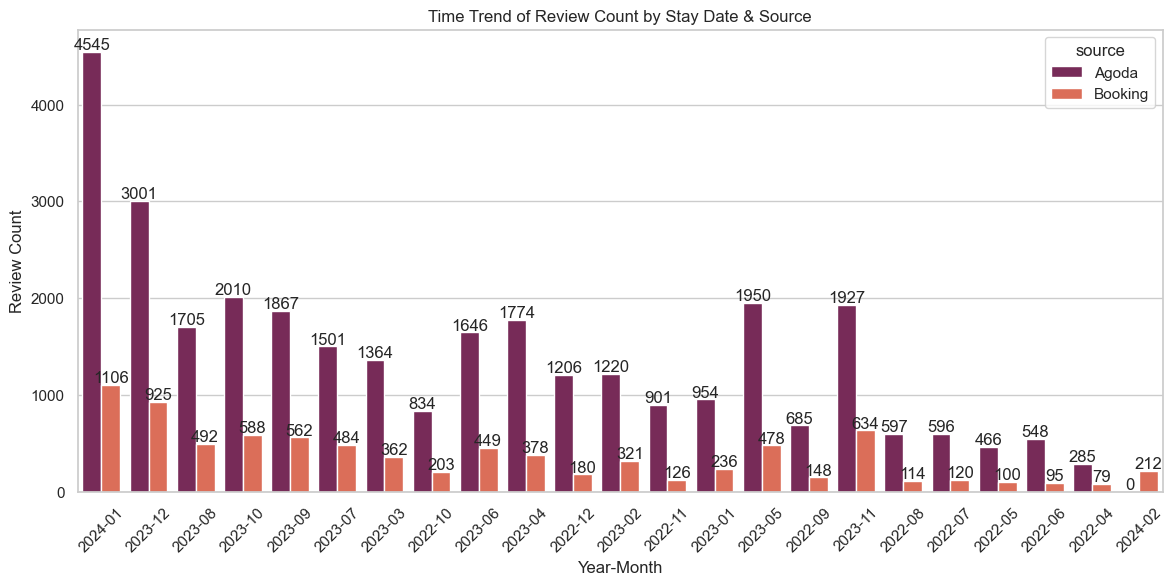

In [37]:
# Plot the time trend of review counts
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="stay_year_month", data=df_review, hue="source", palette="rocket")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Time Trend of Review Count by Stay Date & Source")
plt.xlabel("Year-Month")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.show()

### g) Total Reviews Over Time by review_date

#### By review_date

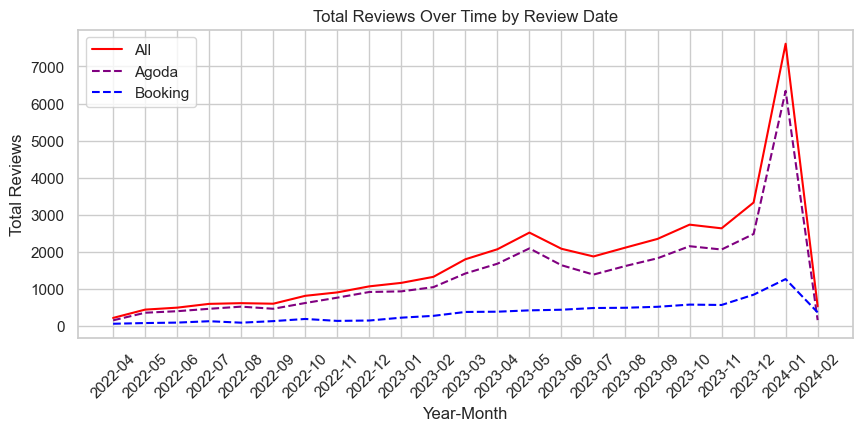

In [38]:
# Convert "review_year_month" to string to avoid conversion issues
df_review["review_year_month_str"] = df_review["review_year_month"].astype(str)

# Group by year and month, then count the number of reviews
review_counts = df_review.groupby("review_year_month_str").size().reset_index(name="total_reviews")

# Group by year and month for Agoda/Booking reviews, then count the number of reviews
review_counts_agoda = df_review[df_review["source"] == "Agoda"].groupby("review_year_month_str").size().reset_index(name="total_reviews_agoda")
review_counts_booking = df_review[df_review["source"] == "Booking"].groupby("review_year_month_str").size().reset_index(name="total_reviews_booking")

# Plot the line chart
plt.figure(figsize=(10, 4))

# Plot line for all reviews
sns.lineplot(x="review_year_month_str", y="total_reviews", data=review_counts, color="red", label="All")

# Plot line for Agoda reviews
sns.lineplot(x="review_year_month_str", y="total_reviews_agoda", data=review_counts_agoda, 
             color="purple", linestyle="--", label="Agoda")

# Plot line for Booking reviews
sns.lineplot(x="review_year_month_str", y="total_reviews_booking", data=review_counts_booking, 
             color="blue", linestyle="--", label="Booking")

plt.title("Total Reviews Over Time by Review Date")
plt.xlabel("Year-Month")
plt.ylabel("Total Reviews")
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### By stay_date

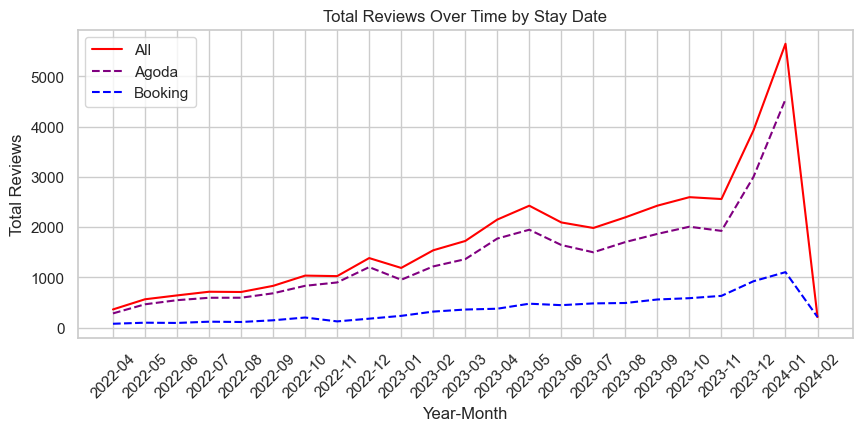

In [39]:
# Convert "stay_year_month" to string to avoid conversion issues
df_review["stay_year_month_str"] = df_review["stay_year_month"].astype(str)

# Group by year and month, then count the number of reviews
stay_review_counts = df_review.groupby("stay_year_month_str").size().reset_index(name="total_reviews")

# Group by year and month for Agoda/Booking reviews, then count the number of reviews
stay_review_agoda = df_review[df_review["source"] == "Agoda"].groupby("stay_year_month_str").size().reset_index(name="total_reviews_agoda")
stay_review_booking = df_review[df_review["source"] == "Booking"].groupby("stay_year_month_str").size().reset_index(name="total_reviews_booking")

# Plot the line chart
plt.figure(figsize=(10, 4))

# Plot line for all reviews
sns.lineplot(x="stay_year_month_str", y="total_reviews", data=stay_review_counts, color="red", label="All")

# Plot line for Agoda reviews
sns.lineplot(x="stay_year_month_str", y="total_reviews_agoda", data=stay_review_agoda, 
             color="purple", linestyle="--", label="Agoda")

# Plot line for Booking reviews
sns.lineplot(x="stay_year_month_str", y="total_reviews_booking", data=stay_review_booking, 
             color="blue", linestyle="--", label="Booking")

plt.title("Total Reviews Over Time by Stay Date")
plt.xlabel("Year-Month")
plt.ylabel("Total Reviews")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### h) Distribution of Stay-Review Time Intervals

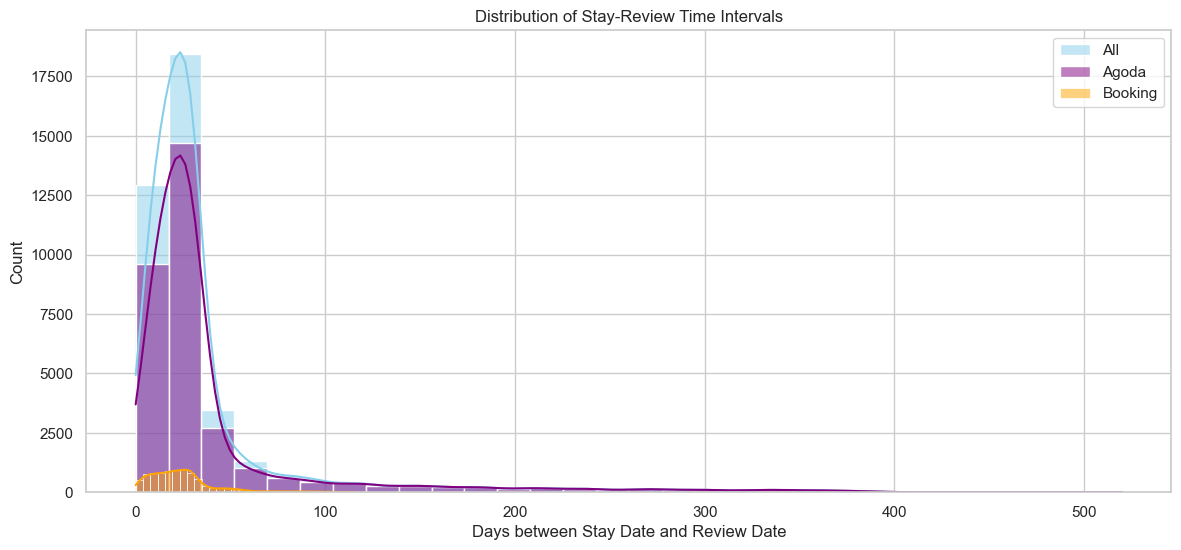

In [40]:
# Calculate the time interval between stay_date and review_date
df_review["stay_review_interval"] = df_review["review_date"] - df_review["stay_date"]

# Find out all reviews from Agoda / Booking
df_review_agoda = df_review[df_review["source"] == "Agoda"]
df_review_booking = df_review[df_review["source"] == "Booking"]

# Plot the distribution of stay-review time intervals
plt.figure(figsize=(14, 6))

# Plot distribution for All reviews
sns.histplot(df_review["stay_review_interval"].dt.days, bins=30, kde=True, color="skyblue", label="All")

# Plot distribution for Agoda reviews
sns.histplot(df_review_agoda["stay_review_interval"].dt.days, bins=30, kde=True, color="purple", label="Agoda")

# Plot distribution for Booking reviews
sns.histplot(df_review_booking["stay_review_interval"].dt.days, bins=30, kde=True, color="orange", label="Booking")

plt.title("Distribution of Stay-Review Time Intervals")
plt.xlabel("Days between Stay Date and Review Date")
plt.ylabel("Count")
plt.legend()
plt.show()

### i) Proportion of Reviews in Same Year-Month as Stay

#### For Agoda & Booking

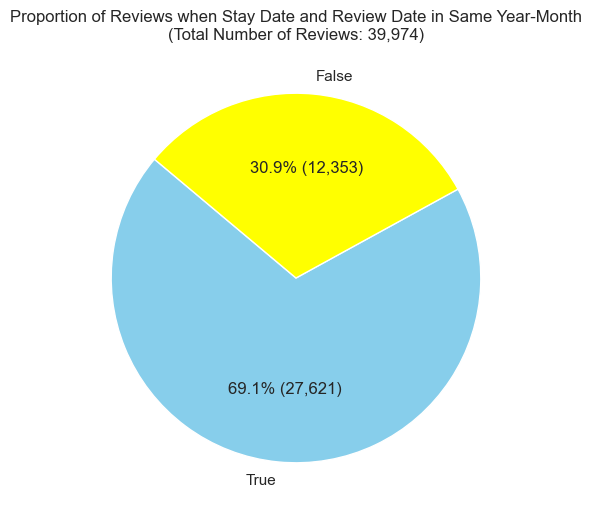

In [41]:
# Check if the review is done in the same year-month as the stay_date
df_review["same_year_month"] = (df_review["stay_date"].dt.to_period("M") == df_review["review_date"].dt.to_period("M"))

# Count number of true/false
same_year_month_counts = df_review["same_year_month"].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(same_year_month_counts, labels=same_year_month_counts.index, autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(same_year_month_counts) / 100), startangle=140, colors=["skyblue", "yellow"])
plt.title("Proportion of Reviews when Stay Date and Review Date in Same Year-Month\n(Total Number of Reviews: {:,})".format(sum(same_year_month_counts)))
plt.show()

#### For Agoda

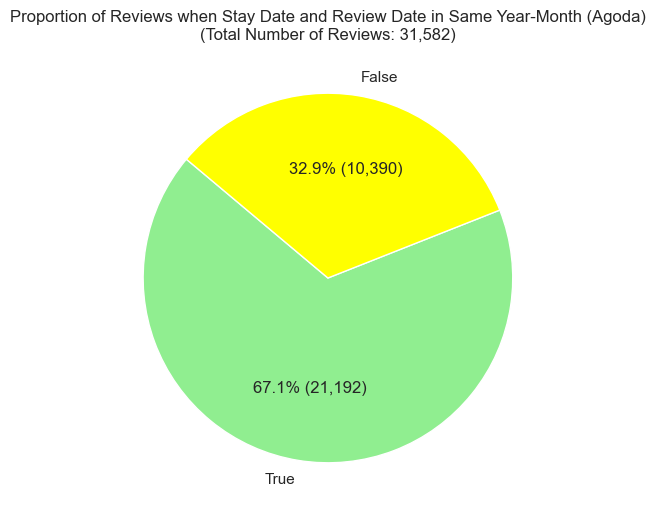

In [42]:
# Find out all reviews from Agoda
df_review_agoda = df_review[df_review["source"] == "Agoda"]

# Count number of true/false
same_year_month_counts_agoda = df_review_agoda["same_year_month"].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(same_year_month_counts_agoda, labels=same_year_month_counts_agoda.index, autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(same_year_month_counts_agoda) / 100), startangle=140, colors=["lightgreen", "yellow"])
plt.title("Proportion of Reviews when Stay Date and Review Date in Same Year-Month (Agoda)\n(Total Number of Reviews: {:,})".format(sum(same_year_month_counts_agoda)))
plt.show()

#### For Booking

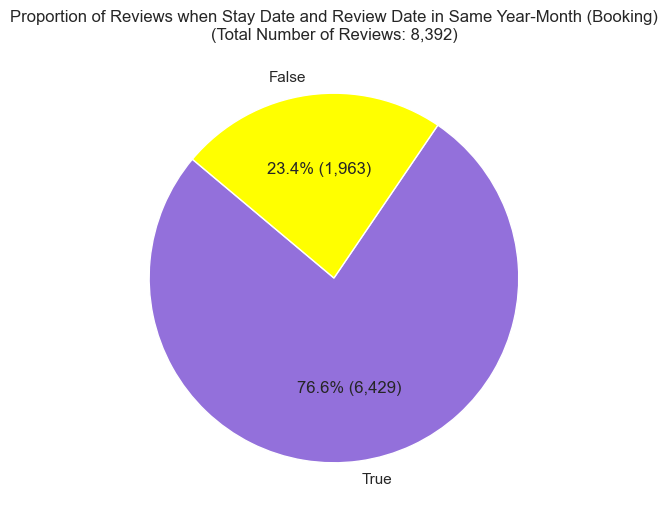

In [43]:
# Find out all reviews from Booking
df_review_booking = df_review[df_review["source"] == "Booking"]

# Count number of true/false
same_year_month_counts_booking = df_review_booking["same_year_month"].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(same_year_month_counts_booking, labels=same_year_month_counts_booking.index, autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * sum(same_year_month_counts_booking) / 100), startangle=140, colors=["mediumpurple", "yellow"])
plt.title("Proportion of Reviews when Stay Date and Review Date in Same Year-Month (Booking)\n(Total Number of Reviews: {:,})".format(sum(same_year_month_counts_booking)))
plt.show()

### j) Distribution of Reviews in World Map

C:\Users\User\AppData\Local\Temp\ipykernel_16020\2798751889.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


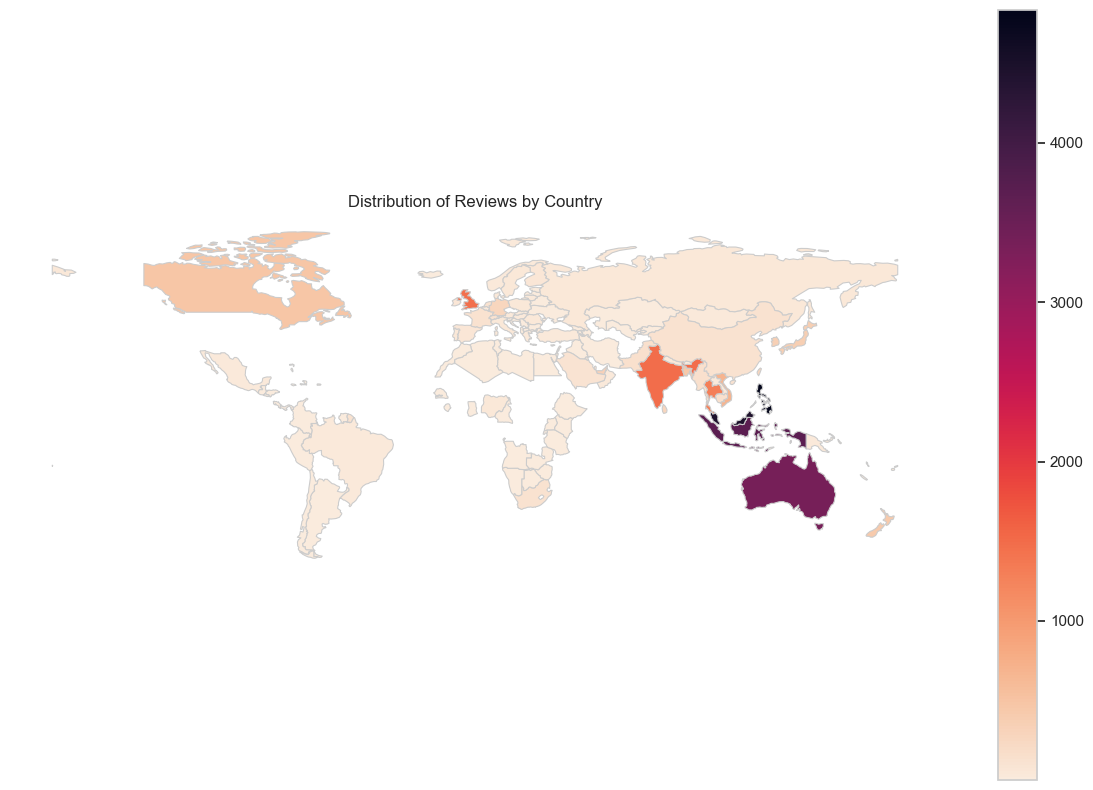

In [44]:
# Get GeoDataFrame with country geometries
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge review data with the GeoDataFrame based on the country
df_world = world.merge(df_review.groupby("country").size().reset_index(name="review_count"), how="left", left_on="name", right_on="country")

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_world.plot(column="review_count", cmap="rocket_r", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Distribution of Reviews by Country")
ax.set_axis_off()

plt.show()

In [45]:
# Find unique countries in df_review
unique_country = df_review["country"].unique()

# Check for countries in df_review that are not in df_world
missing_countries = [country for country in unique_country if country not in df_world["name"].unique()]

print(f"Countries and regions in df_review, but not found in df_world: {len(missing_countries)}")
print(missing_countries)

Countries and regions in df_review, but not found in df_world: 39
['Singapore', 'Hong Kong SAR, China', 'Maldives', 'United States', 'Brunei Darussalam', 'Mauritius', "Cote D'ivoire", 'Monaco', 'Czech Republic', 'Cayman Islands', 'Macau SAR, China', 'Guam', 'Turks & Caicos Islands', 'Jersey', 'Aruba', 'Bermuda', 'Seychelles', 'Bahrain', 'Guernsey', 'Sint Maarten (Netherlands)', 'Palestinian Territory', 'Malta', 'Kiribati', 'Gibraltar', 'Barbados', 'French Polynesia', 'Isle Of Man', 'Solomon Islands', 'Mayotte', 'Northern Mariana Islands', 'U.S. Virgin Islands', 'Hong Kong', 'Andorra', 'Macao', 'East Timor', 'Reunion', 'Tuvalu', 'Other', 'Pitcairn']


### k) Distribution by Sentiment

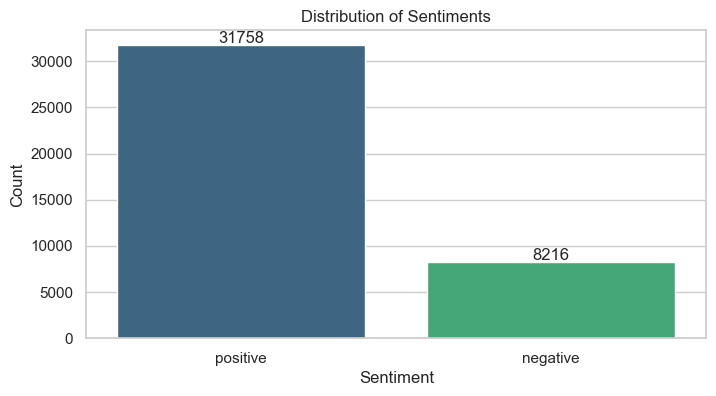

In [46]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x="sentiment", data=df_review, palette="viridis")

# Add annotations for bar counts
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [47]:
sentiment_count = df_review.groupby([df_review["sentiment"], df_review["stay_date"].dt.year]).size().reset_index(name="count")
sentiment_count2 = sentiment_count.pivot_table(index="stay_date", columns="sentiment", values="count", 
                                               aggfunc="sum", margins=True, margins_name="Total")
sentiment_count2.columns.name = None
sentiment_count2

,negative,positive,Total
stay_date,,,
2022,1704,5579,7283
2023,5402,21426,26828
2024,1110,4753,5863
Total,8216,31758,39974


In [52]:
# Save dataset as csv
#reviews_per_hotel.to_csv(SRC_PATH + "agoda_reviewers_per_hotel.csv", index=False, encoding="utf-8")